<a href="https://colab.research.google.com/github/MarcoChartier/Projet-PFE/blob/main/Projet_PFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet PFE
## Description
Se projet est une application batîe dans le but d'aider les charges de transformation numérique à évaluer le projet. 

## Configuration
Ce projet nessésite de connaitre le language de progammation. Des explemes de code serons disponible au besoin. 

# Partie d'analyse de l'investissement

In [ ]:
pip install numpy-financial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Importation des modules complémentaires
# Module à importer pour la partie financière
import numpy_financial as npf # Module des formules financières
import numpy as np # Module pour utiliser des arrays
import random # Module des fonctions aléatoires
import pandas as pd # Module pour la gestion des tableaux de données
import matplotlib.pyplot as plt # Module pour dessiner des graphiques 

## Hypotèse de travail


Remplir les informations suivante

In [ ]:
year = 10 #@param {type:"slider", min:5, max:20, step:1} 
p_inves = 20000 #@param {type:"number"}
nb_licences = 25 #@param {type:"number"}
c_licences = 12 #@param {type:"number"}
p_econo = 5000 #@param {type:"number"}
c_fixe = 1500 #@param {type:"number"}
c_variable = 6 #@param {type:"number"}
low = 10.1
high = 11
mode = 10.3

In [ ]:
# Initialisation des tableaux
tab_inves = np.array([p_inves])
tab_econo = np.array([0])
tab_c_fixe = np.array([])
tab_c_variable = np.array([])
table_c_licences = np.array([])

for i in range(year) :
  tab_inves = np.append(tab_inves,0)

for i in range(year+1) :
  if i == 0 :
    tab_c_fixe = np.append(tab_c_fixe,0)
  elif i == 1 :
    tab_c_fixe = np.append(tab_c_fixe,c_fixe)
  else :
    tab_c_fixe = np.append(tab_c_fixe,tab_c_fixe[i-1]*(np.random.choice([1,1.5,2],p=[0.6,0.25,0.15])))


for i in range(year+1) :
  if i == 0 :
    tab_c_variable = np.append(tab_c_variable,0)
  elif i == 1 :
    tab_c_variable = np.append(tab_c_variable,c_variable*nb_licences)
  else :
    tab_c_variable = np.append(tab_c_variable,tab_c_variable[i-1]*(random.triangular(low,high,mode)/10))

for i in range(year) :
  if i == 0 :
    tab_econo = np.append(tab_econo,0)
  elif i ==1 :
    tab_econo = np.append(tab_econo,p_econo)
  else :
    tab_econo = np.append(tab_econo,random.uniform(p_econo,p_econo*2))

In [ ]:
er = pd.DataFrame(columns=['Économie', 'Cout variable', 'Cout fixe', "Investissement","Total cout", "Total"], dtype='float')
er["Économie"] = tab_econo
er["Cout variable"] = tab_c_variable
er["Cout fixe"] = tab_c_fixe
er["Investissement"] = tab_inves
er["Total cout"] = tab_c_variable + tab_c_fixe + tab_inves
er["Total"] = tab_econo - er["Total cout"]
er = er.round(0)
er.transpose()

,0,1,2,3,4,5,6,7,8,9,10
Économie,0.0,0.0,5000.0,7262.0,8493.0,8483.0,7352.0,8299.0,5010.0,7684.0,7048.0
Cout variable,0.0,150.0,154.0,159.0,170.0,182.0,191.0,199.0,208.0,216.0,230.0
Cout fixe,0.0,1500.0,1500.0,1500.0,2250.0,2250.0,2250.0,3375.0,3375.0,3375.0,3375.0
Investissement,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total cout,20000.0,1650.0,1654.0,1659.0,2420.0,2432.0,2441.0,3574.0,3583.0,3591.0,3605.0
Total,-20000.0,-1650.0,3346.0,5602.0,6073.0,6051.0,4910.0,4725.0,1427.0,4093.0,3443.0


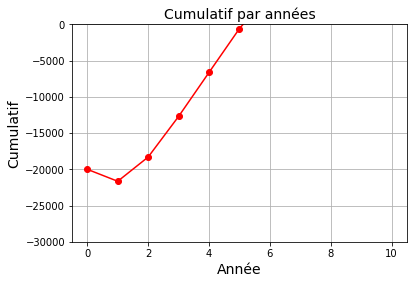

In [ ]:
er["Total cumul"] = er["Total"].cumsum()
plt.plot(er.index, er['Total cumul'], color='red', marker='o',)
plt.title('Cumulatif par années', fontsize=14)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Cumulatif', fontsize=14)
plt.ylim(-p_inves*1.5,0)
plt.grid(True)
plt.show()

In [ ]:
def tableau() :
# Initialisation des tableaux
  tab_inves = np.array([p_inves])
  tab_econo = np.array([0])
  tab_c_fixe = np.array([])
  tab_c_variable = np.array([])
  table_c_licences = np.array([])

  for i in range(year) :
    tab_inves = np.append(tab_inves,0)

  for i in range(year+1) :
    if i == 0 :
      tab_c_fixe = np.append(tab_c_fixe,0)
    elif i == 1 :
      tab_c_fixe = np.append(tab_c_fixe,c_fixe)
    else :
      tab_c_fixe = np.append(tab_c_fixe,tab_c_fixe[i-1]*(np.random.choice([1,1.5,2],p=[0.6,0.25,0.15])))


  for i in range(year+1) :
    if i == 0 :
      tab_c_variable = np.append(tab_c_variable,0)
    elif i == 1 :
      tab_c_variable = np.append(tab_c_variable,c_variable*nb_licences)
    else :
      tab_c_variable = np.append(tab_c_variable,tab_c_variable[i-1]*(random.triangular(low,high,mode)/10))

  for i in range(year) :
    if i == 0 :
      tab_econo = np.append(tab_econo,0)
    elif i ==1 :
      tab_econo = np.append(tab_econo,p_econo)
    else :
      tab_econo = np.append(tab_econo,random.uniform(p_econo,p_econo*2))

  er = pd.DataFrame(columns=['Économie', 'Cout variable', 'Cout fixe', "Investissement","Total cout", "Total"], dtype='float')
  er["Économie"] = tab_econo
  er["Cout variable"] = tab_c_variable
  er["Cout fixe"] = tab_c_fixe
  er["Investissement"] = tab_inves
  er["Total cout"] = tab_c_variable + tab_c_fixe + tab_inves
  er["Total"] = tab_econo - er["Total cout"]
  
  return er["Total"]

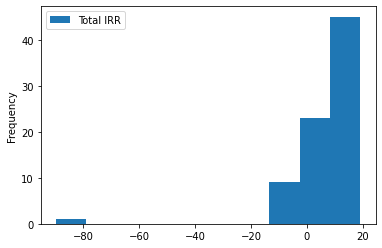

In [ ]:
tab_irr = np.array([])


for i in range(150) :
  tab_irr = np.append(tab_irr,npf.irr(tableau())*100)

df = pd.DataFrame(data={'Total IRR': tab_irr})
df = df.round(2)
df.describe()
# Show plot
df.plot(kind='hist')

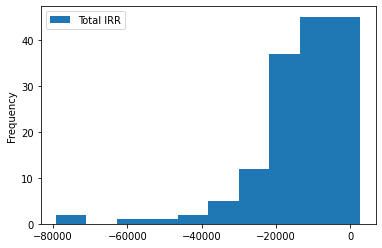

In [ ]:
tab_npv = np.array([])


for i in range(150) :
  tab_npv = np.append(tab_npv,npf.npv(0.15,tableau()))

df = pd.DataFrame(data={'Total IRR': tab_npv})
df = df.round(2)
df
# Show plot
df.plot(kind='hist')

# New Section

# New Section

# New Section

In [ ]:
#Modification fait par sebastian

In [ ]:
#Test

In [ ]:
import numpy as np
print(np.pi)

3.141592653589793
